**Proyek Pertama - Predictive Analytics: Airbnb Price**
---
Nama : Kasya Rizkia Putri

Email : kasya.putri14@gmail.com

Dataset : https://www.kaggle.com/datasets/lovishbansal123/airbnb-data?resource=download

**Deskripsi**

Proyek ini bertujuan untuk membuat model machine learning yang dapat memprediksi harga sewa Airbnb berdasarkan fasilitas dan jenis hunian yang disewakan. Model ini akan membantu tuan rumah untuk menentukan harga sewa yang kompetitif dan optimal untuk properti mereka, serta membantu tamu Airbnb untuk menemukan akomodasi yang sesuai dengan anggaran mereka.

# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Data Understanding

In [2]:
# Load data
airbnb = pd.read_csv('Airbnb_Data.csv')
airbnb

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


**Exploratory Data - Deskripsi Variabel**

In [3]:
# Mendapatkan informasi dari dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
# Menghilangkan atau drop fitur yang tidak mempengaruhi harga Airbnb
airbnb = airbnb.drop(['id',
                      'cancellation_policy',
                      'description',
                      'first_review',
                      'amenities',
                      'neighbourhood',
                      'host_has_profile_pic',
                      'host_identity_verified',
                      'host_response_rate',
                      'host_since',
                      'instant_bookable',
                      'last_review',
                      'longitude',
                      'latitude',
                      'name',
                      'number_of_reviews',
                      'review_scores_rating',
                      'thumbnail_url',
                      'zipcode',
                      'cleaning_fee'], axis='columns')

In [5]:
airbnb.describe()

,log_price,accommodates,bathrooms,bedrooms,beds
count,74111.000000,74111.000000,73911.000000,74020.000000,73980.000000
mean,4.782069,3.155146,1.235263,1.265793,1.710868
std,0.717394,2.153589,0.582044,0.852143,1.254142
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,1.000000,1.000000
75%,5.220356,4.000000,1.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,10.000000,18.000000


In [6]:
# Mencari missing value
airbnb.isnull().sum()

log_price          0
property_type      0
room_type          0
accommodates       0
bathrooms        200
bed_type           0
city               0
bedrooms          91
beds             131
dtype: int64

In [7]:
# Menghapus missing value
airbnb.dropna(inplace=True)
airbnb.isnull().sum().sum()

0

In [8]:
airbnb.describe()

,log_price,accommodates,bathrooms,bedrooms,beds
count,73766.000000,73766.000000,73766.000000,73766.000000,73766.000000
mean,4.782761,3.159518,1.235630,1.266369,1.712320
std,0.717716,2.155023,0.582462,0.853104,1.255326
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,1.000000,1.000000
50%,4.718499,2.000000,1.000000,1.000000,1.000000
75%,5.220356,4.000000,1.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,10.000000,18.000000


In [16]:
airbnb.shape

(73766, 9)

In [17]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73766 entries, 0 to 74110
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   log_price      73766 non-null  float64
 1   property_type  73766 non-null  object 
 2   room_type      73766 non-null  object 
 3   accommodates   73766 non-null  int64  
 4   bathrooms      73766 non-null  float64
 5   bed_type       73766 non-null  object 
 6   city           73766 non-null  object 
 7   bedrooms       73766 non-null  float64
 8   beds           73766 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 5.6+ MB


**Exploratory Data - Univariate Analysis**

In [18]:
numerical_ftr = ['log_price', 'accomodates', 'bathrooms', 'bedrooms', 'beds']
categorical_ftr = ['property_type', 'room_type', 'bed_type', 'city']

Categorical Feature

In [19]:
airbnb.groupby('property_type')['property_type'].agg('count')

property_type
Apartment             48772
Bed & Breakfast         458
Boat                     65
Boutique hotel           69
Bungalow                365
Cabin                    72
Camper/RV                93
Casa particular           1
Castle                   13
Cave                      2
Chalet                    6
Condominium            2654
Dorm                    134
Earth House               4
Guest suite             123
Guesthouse              497
Hostel                   70
House                 16432
Hut                       8
In-law                   71
Island                    1
Lighthouse                1
Loft                   1239
Other                   600
Serviced apartment       21
Tent                     18
Timeshare                77
Tipi                      3
Townhouse              1690
Train                     2
Treehouse                 7
Vacation home            11
Villa                   178
Yurt                      9
Name: property_type, dtype: int64

In [20]:
# Buat boolean mask
mask = ~airbnb['property_type'].isin(['Bed & Breakfast', 'Boat','Bungalow', 'Dorm', 'Guest suite',
                                      'Villa', 'In-law', 'Camper/RV', 'Boutique hotel', 'Hostel',
                                      'Cabin', 'Timeshare', 'Boat', 'Serviced apartment', 'Castle',
                                      'Treehouse', 'Tipi', 'Vacation home', 'Casa particular', 'Cave',
                                      'Chalet', 'Earth House', 'Guesthouse', 'Hut', 'Island', 'Lighthouse', 'Tent',
                                      'Train', 'Villa', 'Yurt'])
# Drop mask
airbnb = airbnb[mask]

             Jumlah  Persentase
Apartment     48772        68.3
House         16432        23.0
Condominium    2654         3.7
Townhouse      1690         2.4
Loft           1239         1.7
Other           600         0.8


<Axes: title={'center': 'property_type'}>

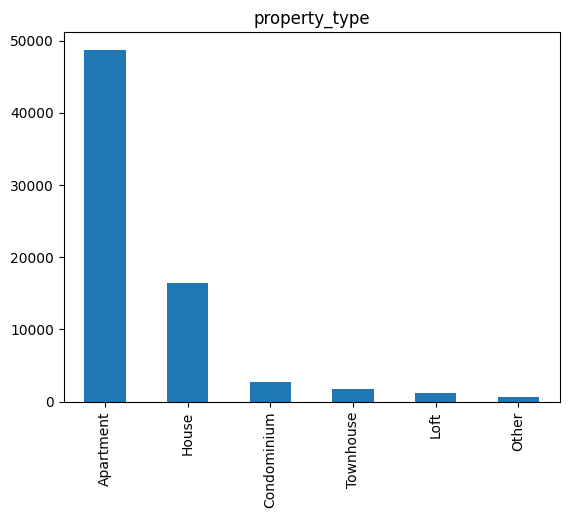

In [21]:
# Fitur Property Type
feature = categorical_ftr[0]
count = airbnb[feature].value_counts()
percent = 100*airbnb[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

In [22]:
airbnb.groupby('room_type')['room_type'].agg('count')

room_type
Entire home/apt    39834
Private room       29603
Shared room         1950
Name: room_type, dtype: int64

                 Jumlah  Persentase
Entire home/apt   39834        55.8
Private room      29603        41.5
Shared room        1950         2.7


<Axes: title={'center': 'room_type'}>

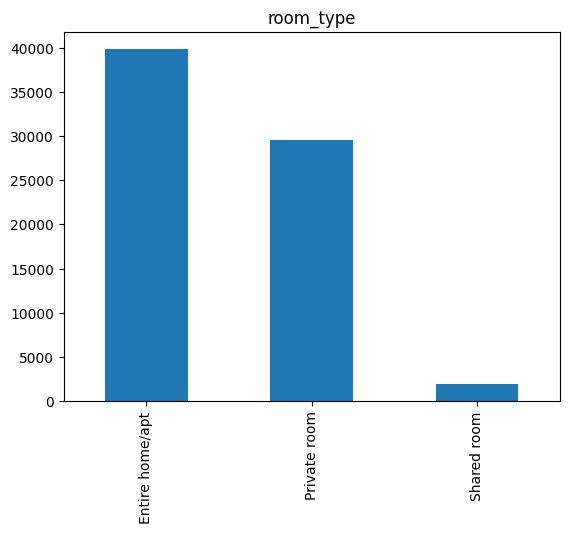

In [23]:
# Fitur Room Type
feature = categorical_ftr[1]
count = airbnb[feature].value_counts()
percent = 100*airbnb[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

In [24]:
airbnb.groupby('bed_type')['bed_type'].agg('count')

bed_type
Airbed             463
Couch              262
Futon              719
Pull-out Sofa      559
Real Bed         69384
Name: bed_type, dtype: int64

In [25]:
# Melakukan drop pada fitur bed_type
airbnb = airbnb.drop(['bed_type'], axis='columns')

In [26]:
airbnb.groupby('city')['city'].agg('count')

city
Boston      3398
Chicago     3637
DC          5552
LA         20829
NYC        31859
SF          6112
Name: city, dtype: int64

         Jumlah  Persentase
NYC       31859        44.6
LA        20829        29.2
SF         6112         8.6
DC         5552         7.8
Chicago    3637         5.1
Boston     3398         4.8


<Axes: title={'center': 'city'}>

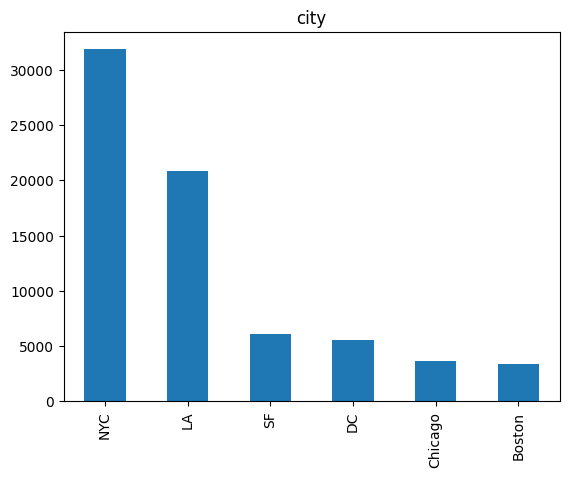

In [27]:
# Fitur City
feature = categorical_ftr[3]
count = airbnb[feature].value_counts()
percent = 100*airbnb[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

In [28]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71387 entries, 0 to 74109
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   log_price      71387 non-null  float64
 1   property_type  71387 non-null  object 
 2   room_type      71387 non-null  object 
 3   accommodates   71387 non-null  int64  
 4   bathrooms      71387 non-null  float64
 5   city           71387 non-null  object 
 6   bedrooms       71387 non-null  float64
 7   beds           71387 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.9+ MB


Numerical Feature

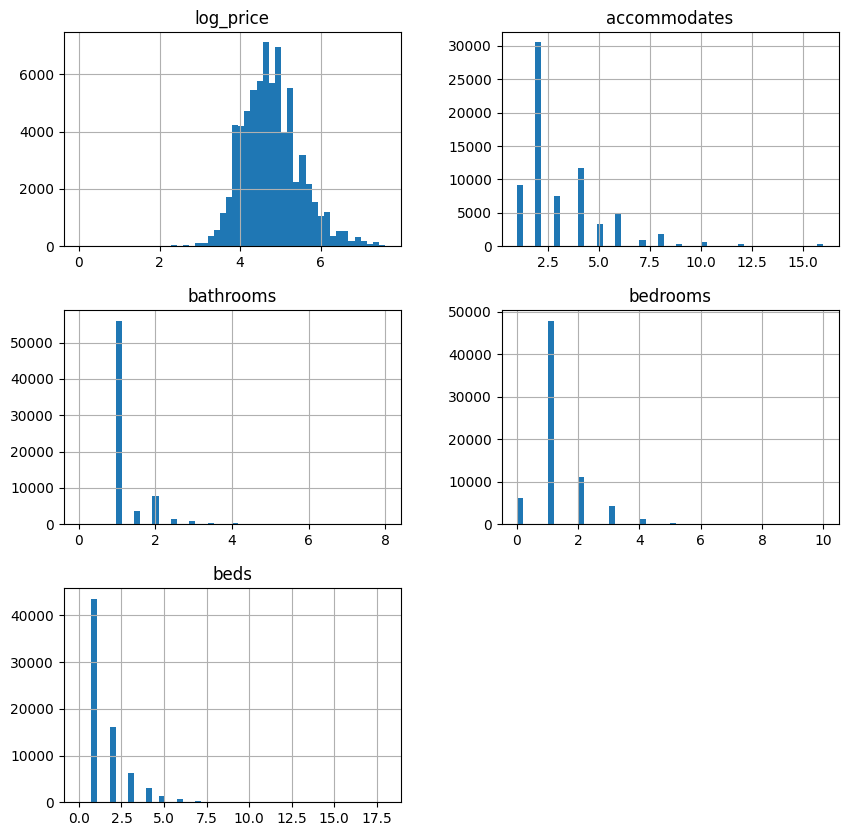

In [29]:
airbnb.hist(bins=50, figsize=(10,10))
plt.show()

**Exploratory Analysis - Multivariate Analysis**

In [30]:
# Karena harga yang tertera masih berupa log_price, akan diubah menjadi original_price

import math
# Buat kolom baru untuk original_price
airbnb['original_price'] = airbnb['log_price'].apply(math.exp)

# Hapus kolom log_price
del airbnb['log_price']

In [31]:
airbnb.head()

,property_type,room_type,accommodates,bathrooms,city,bedrooms,beds,original_price
0,Apartment,Entire home/apt,3,1.0,NYC,1.0,1.0,150.0
1,Apartment,Entire home/apt,7,1.0,NYC,3.0,3.0,169.0
2,Apartment,Entire home/apt,5,1.0,NYC,1.0,3.0,145.0
3,House,Entire home/apt,4,1.0,SF,2.0,2.0,750.0
4,Apartment,Entire home/apt,2,1.0,DC,0.0,1.0,115.0


<ipython-input-32-b4c8ebdd7d6f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='original_price', kind='bar', dodge=False, height=4, aspect=3, data=airbnb, palette='Blues')
<ipython-input-32-b4c8ebdd7d6f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='original_price', kind='bar', dodge=False, height=4, aspect=3, data=airbnb, palette='Blues')
<ipython-input-32-b4c8ebdd7d6f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='original_price', kind='bar', dodge=False, height=4, aspect=3, data=airbnb, palette='Blues'

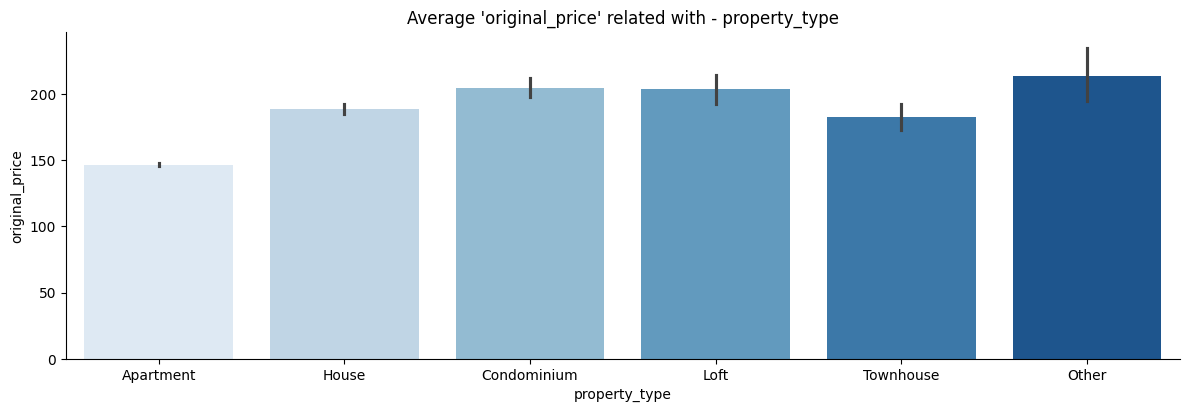

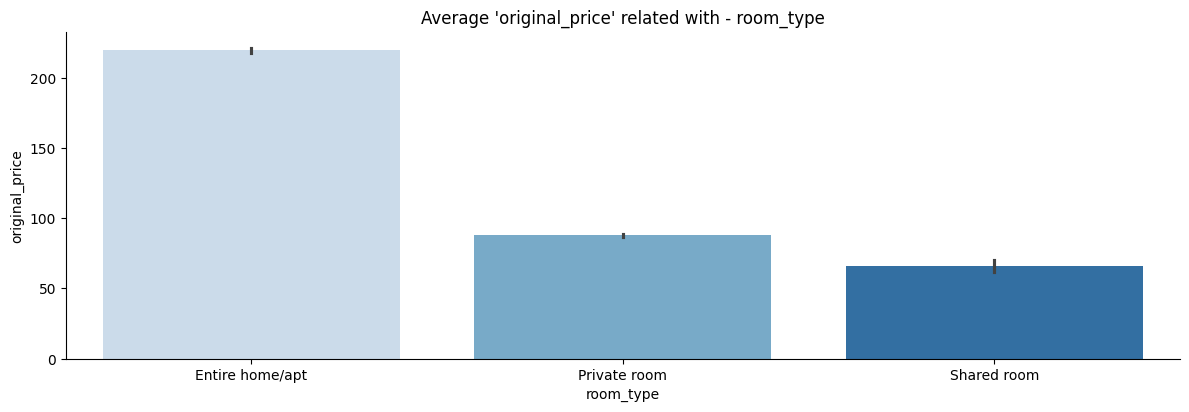

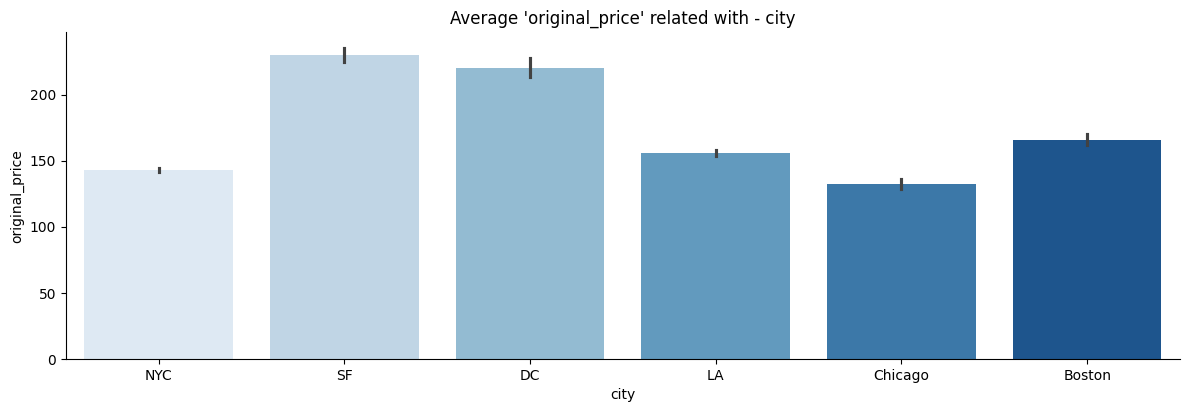

In [32]:
# Categorical Feature
cat_ftr = airbnb.select_dtypes(include='object').columns.to_list()

for col in cat_ftr:
  sns.catplot(x=col, y='original_price', kind='bar', dodge=False, height=4, aspect=3, data=airbnb, palette='Blues')
  plt.title("Average 'original_price' related with - {}".format(col))

<ipython-input-33-163258548694>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = airbnb.corr().round(2)


Text(0.5, 1.0, 'Matriks Korelasi untuk Fitur Numerik')

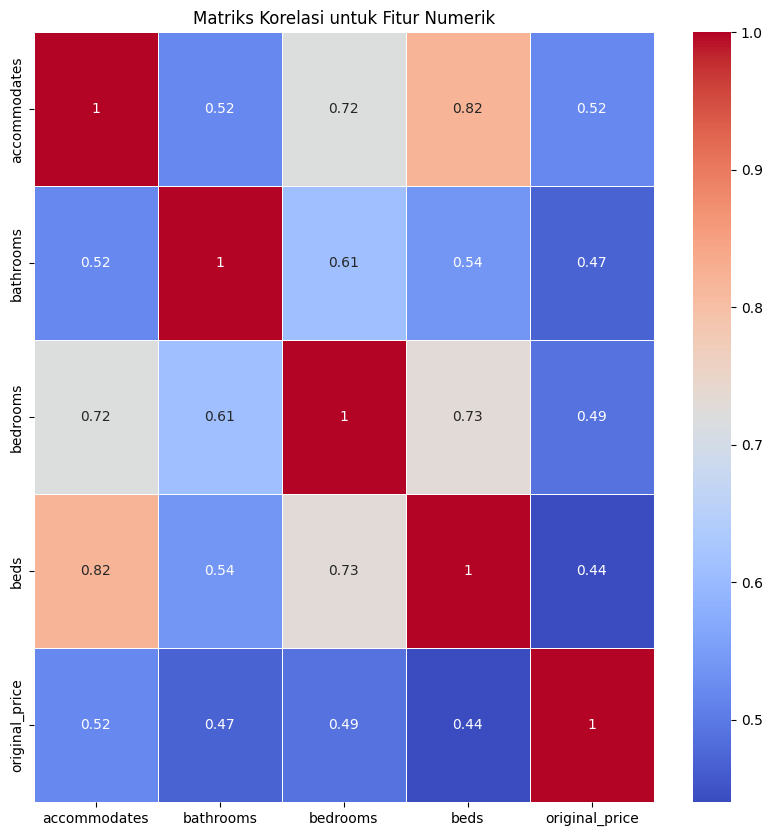

In [33]:
# Numerical Feature
plt.figure(figsize=(10,10))
correlation_matrix = airbnb.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Matriks Korelasi untuk Fitur Numerik")

# Data Preparation

*One Hot Encoding*

In [34]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71387 entries, 0 to 74109
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_type   71387 non-null  object 
 1   room_type       71387 non-null  object 
 2   accommodates    71387 non-null  int64  
 3   bathrooms       71387 non-null  float64
 4   city            71387 non-null  object 
 5   bedrooms        71387 non-null  float64
 6   beds            71387 non-null  float64
 7   original_price  71387 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.9+ MB


In [35]:
# Mengubah fitur kategori menjadi numerik dengan One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
airbnb = pd.get_dummies(data = airbnb, columns=['property_type'])
airbnb = pd.get_dummies(data = airbnb, columns=['room_type'])
airbnb = pd.get_dummies(data = airbnb, columns=['city'])

airbnb.head()

,accommodates,bathrooms,bedrooms,beds,original_price,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,3,1.0,1.0,1.0,150.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,7,1.0,3.0,3.0,169.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,5,1.0,1.0,3.0,145.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,4,1.0,2.0,2.0,750.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,2,1.0,0.0,1.0,115.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


*Train Test Split*

In [36]:
from sklearn.model_selection import train_test_split

X = airbnb.drop(["original_price"], axis=1)
y = airbnb["original_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [37]:
print(f'Total sample pada keseluruhan dataset: {len(X)}')
print(f'Total sample pada dataset train: {len(X_train)}')
print(f'Total sample pada dataset test: {len(X_test)}')

Total sample pada keseluruhan dataset: 71387
Total sample pada dataset train: 64248
Total sample pada dataset test: 7139


*Normalization*

In [38]:
from sklearn.preprocessing import StandardScaler

numerical_ftr = ['accommodates', 'bathrooms', 'bedrooms', 'beds']
scaler = StandardScaler()
scaler.fit(X_train[numerical_ftr])
X_train[numerical_ftr] = scaler.transform(X_train.loc[:, numerical_ftr])
X_train[numerical_ftr].head()

,accommodates,bathrooms,bedrooms,beds
10958,0.391802,-0.415119,-1.498149,-0.573288
65610,-0.540064,-0.415119,-1.498149,-0.573288
22811,1.323669,-0.415119,-0.322280,1.052840
3547,0.391802,-0.415119,-0.322280,1.052840
37976,0.391802,-0.415119,0.853588,0.239776


In [39]:
X_train[numerical_ftr].describe().round(4)

,accommodates,bathrooms,bedrooms,beds
count,64248.0000,64248.0000,64248.0000,64248.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-1.0060,-2.1939,-1.4981,-1.3864
25%,-0.5401,-0.4151,-0.3223,-0.5733
50%,-0.5401,-0.4151,-0.3223,-0.5733
75%,0.3918,-0.4151,-0.3223,0.2398
max,5.9830,12.0361,10.2605,13.2488


In [40]:
# scaling data test
X_test.loc[:, numerical_ftr] = scaler.transform(X_test[numerical_ftr])

# Modeling

**Menentukan model dan parameter terbaik dengan Grid Search**

In [41]:
# Import library yang diperlukan
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [42]:
# mendefinisikan parameter untuk KNN
param_grid_knn = {
    'n_neighbors': np.arange(1, 11),
    'weights': ['uniform', 'distance']
}

# mendefinisikan parameter untuk Random Forest
param_grid_rf = {
    'n_estimators': np.arange(10, 101, 10),
    'max_depth': np.arange(1, 11),
    'min_samples_split': np.arange(2,11)
}

# mendifinisikan parameter Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

In [43]:
# Menghilangkan 'normalize' parameter pada Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False]
}

# GridSearchCV
knn_model = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5)
knn_model.fit(X_train, y_train)

rf_model = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
rf_model.fit(X_train, y_train)

lr_model = GridSearchCV(LinearRegression(), param_grid_lr, cv=5)
lr_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [47]:
print("Best KNN parameters:", knn_model.best_params_)
print("Best Random Forest parameters:", rf_model.best_params_)
print("Best Linear Regression parameters:", lr_model.best_params_)

Best KNN parameters: {'n_neighbors': 10, 'weights': 'uniform'}
Best Random Forest parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Linear Regression parameters: {'fit_intercept': False}


# Evaluation

In [44]:
# Buat variabel MSE
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Linear Regression'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn_model, 'RF': rf_model, 'Linear Regression': lr_model}

# Hitung MSE masing-masing algoritma pada data train dan data test
for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,14.821153,14.818991
RF,14.194456,13.634919
Linear Regression,16.952916,14.991042


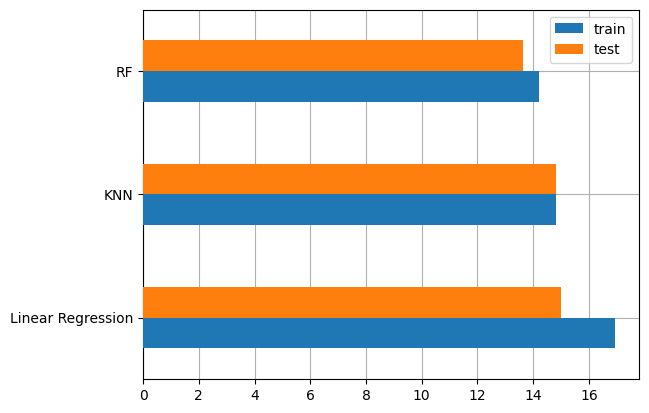

In [45]:
# Membuat bar chart dari metric di atas
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [48]:
# Membandingkan y_true dengan prediksi ketiga model
prediction = X_test.iloc[7:15].copy()
pred_dict = {'y_true':y_test[7:15]}
for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediction).round(2)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Linear Regression
69232,105.0,104.5,122.47,132.64
53606,40.0,95.3,84.03,129.82
52120,111.0,85.7,84.70,81.18
66509,150.0,127.7,130.37,159.28
10054,99.0,205.8,279.97,288.85
39398,70.0,70.8,77.59,40.37
29959,70.0,74.1,77.51,56.98
5131,110.0,109.1,108.52,95.24
